# Capstone Project Part 1: Data Cleaning and Preprocessing

**Author:** Soohyun Ahn <br>
    
**Date:** April 2023<br>
    
**Notebook Number:** 1/ 4

**IMPORTANT NOTE**: At the beginning of my project, I started with a single dataset but a bit later added another one to test and compare them. This decision provided me with valuable learning opportunities and allowed me to experiment with different methods with different datasets. However, after finalizing my project, I decided to showcase the flow of the project based on the chosen dataset. The main reason behind this decision was to avoid overwhelming readers with too many notebooks and to provide a clear and concise workflow. To achieve this, I organized all the notebooks related to the not-chosen dataset into a single folder named **Appendix**. I have included a link to the supplementary appendix notebook for readers who are interested in exploring it. Readers can focus on the major notebooks by following the numbered sequence (part 1, part 2, etc.) without any distractions.

[**Supplementary notebook in Appendix**](https://github.com/treelunar/2023_Capstone_BSTN/blob/main/Appendix/Appendix_Part_1_Data_Preprocessing_MPST.ipynb)

Natural Language Processing (NLP) allows computers to process language in a manner similar to humans. To achieve this, raw text data must be converted into a clean, structured format that computers can understand. Text preprocessing involves several steps, including removing inconsistencies, noise, and irrelevant information, which enhances the efficiency and accuracy of NLP models. High-quality preprocessing enables computers to better comprehend the underlying patterns and relationships within the text.

In this notebook, I will clean our dataset, conduct Exploratory Data Analysis (EDA), and preprocess the text to prepare it for feature engineering and modeling. We will use a publicly available movie dataset created by (created by [Rounak Banik](https://www.kaggle.com/rounakbanik)).

## Dataset Inspection

In [45]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(123)  # set the random seed to a fixed number

# hide warnings

import warnings
warnings.filterwarnings('ignore')

In [46]:
# Import dataset

movies_df = pd.read_csv("movies_metadata.csv")
movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

There are two columns related to title, namely `title` and `original_title`.<br>Let's take a look at them.

In [43]:
# Show the two columns side by side in 10 random rows
movies_df[['title', 'original_title']].sample(10)

,title,original_title
37022,Blair Witch,Blair Witch
15663,The Haunted House,The Haunted House
29493,Art of the Devil,Art Of The Devil
37343,You Are Umasou,おまえうまそうだな
22834,It's My Mother's Birthday Today,It's My Mother's Birthday Today
27705,Two Gentlemen Sharing,Two Gentlemen Sharing
1716,Zero Effect,Zero Effect
3861,Friendly Persuasion,Friendly Persuasion
14501,Panda! Go Panda!,Panda kopanda
33988,Murari,Murari


Upon examination, we found some non-English titles in the `original_title` column. However, the English version of the title can be found in the `title` column. Therefore, for our analysis, we will only consider the `title` column and not the `original_title` column (unless it is required to compare the two columns).

Let's check duplicate rows based on the titles and IMDb IDs.

In [5]:
# Set the display options to show all rows
pd.set_option("display.max_rows", None)

# Find duplicate rows based on 'title' and 'imdb_id'
duplicate_mask = movies_df.duplicated(subset=['imdb_id', 'title'], keep=False)

# Extract duplicate rows
duplicate_rows = movies_df[duplicate_mask][['imdb_id', 'title']]

# Print the number of duplicate rows
print(f"Number of duplicate rows: {len(duplicate_rows)}")

# Print the duplicate rows
print("Duplicate rows:")
print(duplicate_rows)

Number of duplicate rows: 62
Duplicate rows:
         imdb_id                                        title
676    tt0111613                                  The Promise
838    tt0046468                                         Wife
949    tt0022879                           A Farewell to Arms
1465   tt0111613                                  The Promise
2564   tt1736049                         A Place at the Table
4114   tt0235679                Pokémon: Spell of the Unknown
4356   tt2018086                         Camille Claudel 1915
5130   tt0157472                                Clockstoppers
5535   tt0287635  Pokémon 4Ever: Celebi - Voice of the Forest
5710   tt0082992                              Rich and Famous
5865   tt0270288              Confessions of a Dangerous Mind
7345   tt0062229                                  Le Samouraï
8068   tt0295682                                  The Warrior
9165   tt0062229                                  Le Samouraï
9327   tt0295682         

There are 62 duplicate rows.<br>We can drop duplicates while keeping only the first instances.<Br>Also, some movies have "NaN" in their `title` column. So, we can remove them as well.

In [47]:
# Drop rows with NaN in the `title`
movies_df = movies_df.dropna(subset=['title'])

In [48]:
# Drop duplicates and keep only the first instance
movies_df.drop_duplicates(subset='title', keep='first', inplace=True)

In [49]:
# Sanity check
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42277 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  42277 non-null  object 
 1   belongs_to_collection  4358 non-null   object 
 2   budget                 42277 non-null  object 
 3   genres                 42277 non-null  object 
 4   homepage               7241 non-null   object 
 5   id                     42277 non-null  object 
 6   imdb_id                42261 non-null  object 
 7   original_language      42266 non-null  object 
 8   original_title         42277 non-null  object 
 9   overview               41362 non-null  object 
 10  popularity             42277 non-null  object 
 11  poster_path            41906 non-null  object 
 12  production_companies   42277 non-null  object 
 13  production_countries   42277 non-null  object 
 14  release_date           42196 non-null  object 
 15  re

Since the dataset has many columns that are not relevant to our sysnopsis analysis project, we can keep only columns that are relevant to us. 

In [50]:
# Select the desired columns
movies_df = movies_df.loc[:, ['imdb_id', 'title', 'original_title', 'overview', 'genres', 'tagline', 'poster_path']]

# Print the new dataframe
display((movies_df).head(5))

,imdb_id,title,original_title,overview,genres,tagline,poster_path
0,tt0114709,Toy Story,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1,tt0113497,Jumanji,Jumanji,When siblings Judy and Peter discover an encha...,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Roll the dice and unleash the excitement!,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2,tt0113228,Grumpier Old Men,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Still Yelling. Still Fighting. Still Ready for...,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3,tt0114885,Waiting to Exhale,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Friends are the people who let you be yourself...,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4,tt0113041,Father of the Bride Part II,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'id': 35, 'name': 'Comedy'}]",Just When His World Is Back To Normal... He's ...,/e64sOI48hQXyru7naBFyssKFxVd.jpg


We also need our dataset to have no missing values in all columns other than `tagline` and `poster_path`. 

In [51]:
# Drop rows with null values in imdb_id, title, overview, or generes
movies_df = movies_df.dropna(subset=['imdb_id', 'title', 'overview', 'genres'])

# Reset the index of the dataframe
movies_df = movies_df.reset_index(drop=True)

In [52]:
# Sanity check
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41348 entries, 0 to 41347
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   imdb_id         41348 non-null  object
 1   title           41348 non-null  object
 2   original_title  41348 non-null  object
 3   overview        41348 non-null  object
 4   genres          41348 non-null  object
 5   tagline         19040 non-null  object
 6   poster_path     41020 non-null  object
dtypes: object(7)
memory usage: 2.2+ MB


Now we have a workable dataset. We dropped movies with no english titles (`title`) and movies without `overview` or `genres`.<br>`tagline` is not necessary for our project but can be useful references later. `poster_path` is not necessary but we might need them for our final movie recommendation system.

We have total 41,348 unique movies in our dataset.

## Data Pre-Processing: Extracting Genre Information

In [53]:
movies_df['genres'].sample(3)

9070     [{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...
11497                  [{'id': 99, 'name': 'Documentary'}]
27911    [{'id': 10749, 'name': 'Romance'}, {'id': 18, ...
Name: genres, dtype: object

In this `genres` column, we need to extract information under 'name' part.<br>First, we will convert the `genres` column to a list of dictionaries. And then, we will extract the information we want.

In [54]:
import ast

# Convert the 'genres' column to a list of dictionaries
movies_df['genres'] = movies_df['genres'].apply(lambda x: ast.literal_eval(x))

# Extract the 'name' field from each dictionary(d) in the 'genres' column
movies_df['genres'] = movies_df['genres'].apply(lambda x: [d['name'] for d in x])

In [55]:
# Check the result
print(movies_df['genres'].head())

0     [Animation, Comedy, Family]
1    [Adventure, Fantasy, Family]
2               [Romance, Comedy]
3        [Comedy, Drama, Romance]
4                        [Comedy]
Name: genres, dtype: object


The conversion and extraction is successful!

Just to get the sense of how the occurrence of each word in our synopses, we can plot the top words and their counts before performing any text preprocessing, such as removing whitespace, removing stopwords, or lowercasing the text.

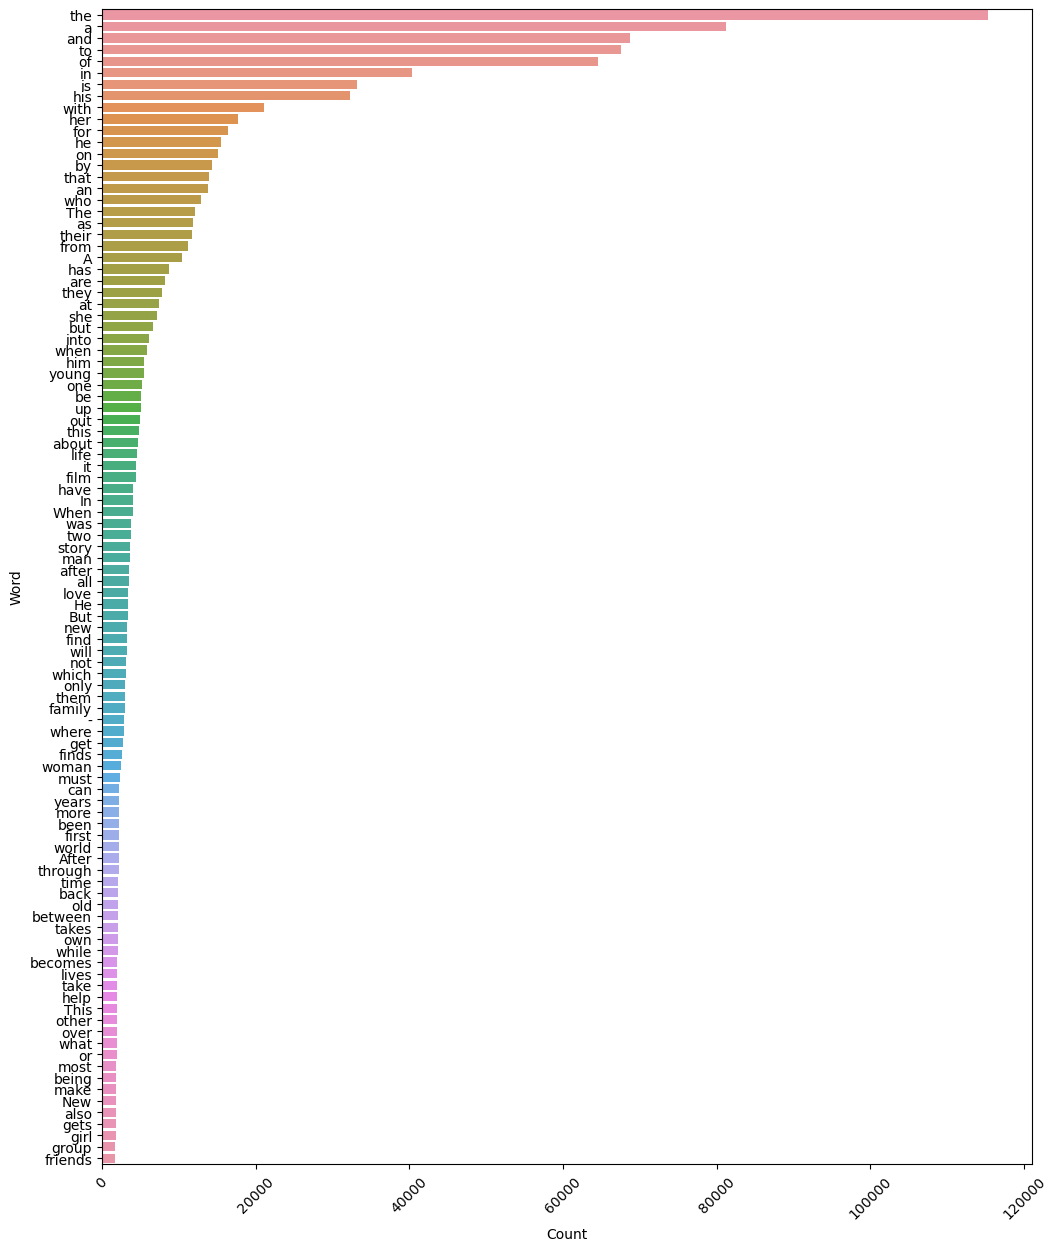

In [56]:
from sklearn.decomposition import PCA
import seaborn as sns
from collections import Counter

# Convert movie_embeddings to a matrix of word vectors using PCA
# Get the most frequent words in the dataset
all_words = ' '.join(movies_df['overview']).split()
top_words = [word for word, count in Counter(all_words).most_common(100)]

# Count the occurrences of the top words in each synopsis separately
word_counts = Counter()
for synopsis in movies_df['overview']:
    words = synopsis.split()
    counts = Counter(words)
    word_counts += Counter({word: counts[word] for word in top_words})

# Create a bar plot of the top words and their counts
data = {'Word': top_words, 'Count': [word_counts[word] for word in top_words]}
df = pd.DataFrame(data)
plt.figure(figsize=(12,15))
sns.barplot(x='Count', y='Word', data=df)
plt.xticks(rotation=45)
plt.show()

As expected, the top 100 words are predominantly stopwords. We also see that **a** and **A** were treated separately, indicating the need for lowercasing.

## Text Data Preprocessing

We can define a function that does non-alphabetical character removal, lowercasing, stopword removal, and so on. We remove people names prior to lowercasing. Note the order of the operation matters here. If we lowercase the text before removing names, they may not be recognized correctly because people names are usually capitalized.

Text data preprocessing involves subjective decisions that can impact outcomes to varying degrees. One such decision is whether to use stemming or lemmatization. Stemming can improve text analysis efficiency by reducing the vocabulary size, but it may not distinguish between different words that share the same root. For instance, stemming would treat "universal," "university," and "universe" as identical. Alternatively, lemmatization produces a more precise root word that takes into account the sentence's context. While I acknowledge the benefits of lemmatization, I opted to use stemming due to the time constraints of my project. I believe this decision was reasonable because stemming is faster and simpler than lemmatization, and I needed to complete the project within a specific timeline.

**NOTE**: The below code is the product of several iterations. For example, before inserting `text = contractions.fix(text)`, the token `nt` appeared in the list of top words. It likely comes from contractions (e.g., "isn't" or "wasn't") in the original text. To make sure it is removed, we should expand contractions before applying other preprocessing steps.

In [20]:
#!pip install contractions
import contractions
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import spacy

# Define stopwords
stop_words = set(stopwords.words('english'))

# Load the small English NER model
nlp = spacy.load("en_core_web_sm")

# Define the function to preprocess text and remove people names
def preprocess_text(text):
    
    # Expand contractions
    text = contractions.fix(text)
    
    # Remove people names
    doc = nlp(text)
    no_name_text = [token.text for token in doc if not token.ent_type_ == 'PERSON']
    
    # Join the text
    no_name_text = ' '.join(no_name_text)
    
    # Remove non-alphabetical characters
    no_name_text = re.sub(r'[^a-zA-Z\s]', '', no_name_text)
    
    # Lowercase the text
    no_name_text = no_name_text.lower()
    
    # Split the text into words
    words = no_name_text.split()
    
    # Remove stopwords
    no_stopword_text = [w for w in words if not w in stop_words]
    
    # Apply stemming to each word
    stemmed_text = [PorterStemmer().stem(word) for word in no_stopword_text]
    
    return ' '.join(stemmed_text)

Now we can apply the `preprocess_text` function to our `overview` column and add the preprocessed column to the dataframe.

In [57]:
# Apply preprocess_text function
# It took approximately 22 minutes

preprocessed_df = pd.DataFrame(movies_df) # create a copy of the dataframe
preprocessed_df['clean_overview'] = preprocessed_df['overview'].apply(lambda x: preprocess_text(x)) # add the cleaned column
preprocessed_df.head()

,imdb_id,title,original_title,overview,genres,tagline,poster_path,clean_overview
0,tt0114709,Toy Story,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[Animation, Comedy, Family]",NaN,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,led woodi toy live happili room birthday bring...
1,tt0113497,Jumanji,Jumanji,When siblings Judy and Peter discover an encha...,"[Adventure, Fantasy, Family]",Roll the dice and unleash the excitement!,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,sibl discov enchant board game open door magic...
2,tt0113228,Grumpier Old Men,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[Romance, Comedy]",Still Yelling. Still Fighting. Still Ready for...,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,famili wed reignit ancient feud next door neig...
3,tt0114885,Waiting to Exhale,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","[Comedy, Drama, Romance]",Friends are the people who let you be yourself...,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,cheat mistreat step women hold breath wait elu...
4,tt0113041,Father of the Bride Part II,Father of the Bride Part II,Just when George Banks has recovered from his ...,[Comedy],Just When His World Is Back To Normal... He's ...,/e64sOI48hQXyru7naBFyssKFxVd.jpg,recov daughter wed receiv news pregnant wife e...


The name removal is not ideal. We can see that some names (e.g., Judy, Peter, Andy) are removed while some (e.g., Woody) remain. But we will proceed in plotting the words frequency using the preprocessed synopsis column.

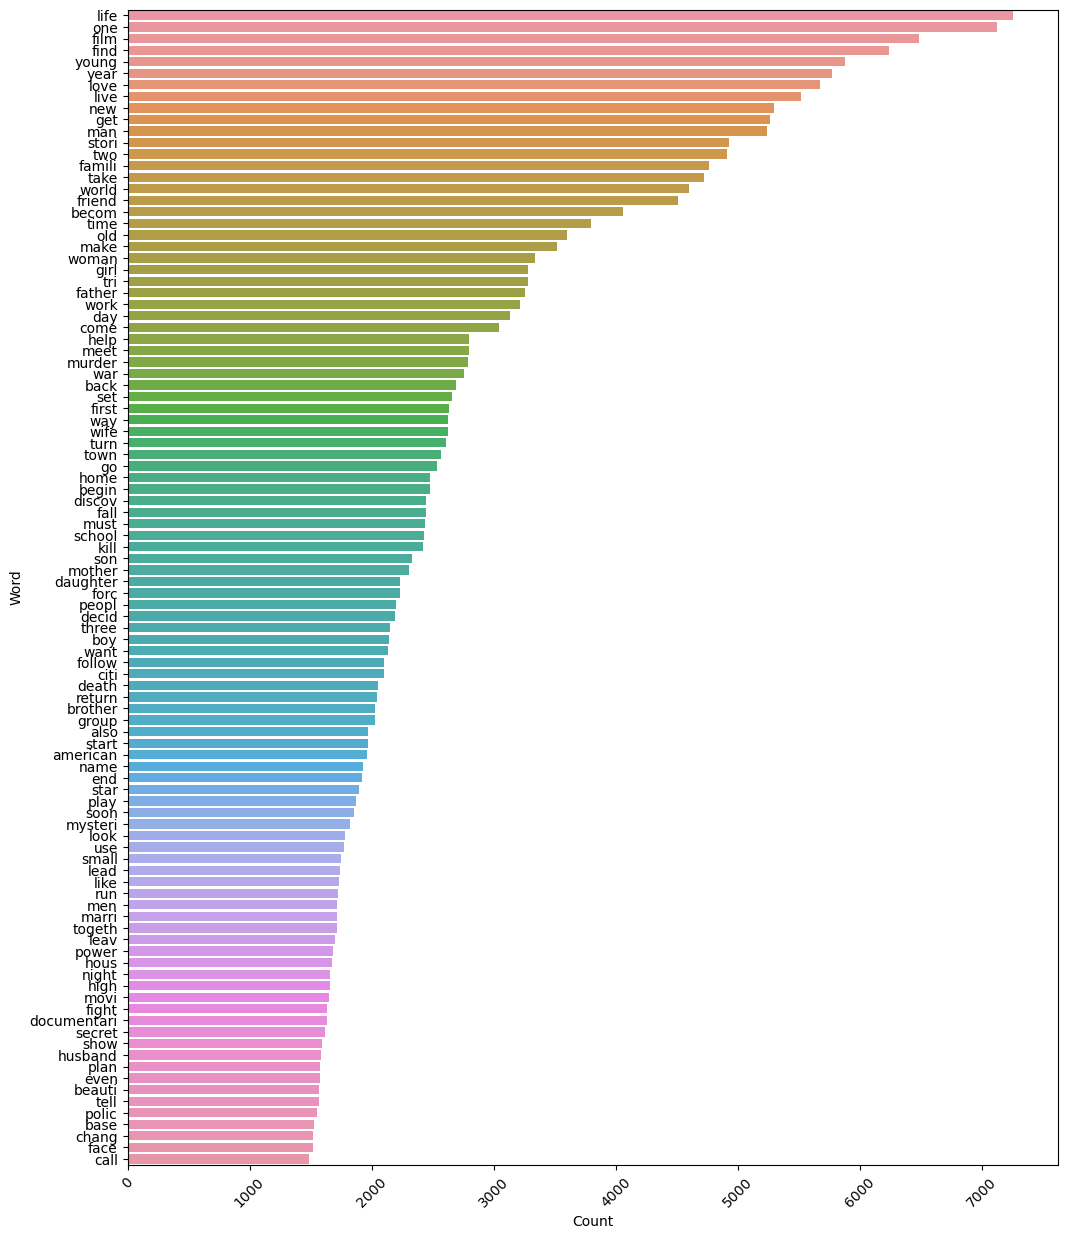

In [22]:
# Get the most frequent words in the cleaned dataset
all_words = ' '.join(preprocessed_df['clean_overview']).split()
top_words = [word for word, count in Counter(all_words).most_common(100)]

# Count the occurrences of the top words in each cleaned plot separately
word_counts = Counter()
for synopsis in preprocessed_df['clean_overview']:
    words = synopsis.split()
    counts = Counter(words)
    word_counts += Counter({word: counts[word] for word in top_words})

# Create a bar plot of the top words and their counts
data = {'Word': top_words, 'Count': [word_counts[word] for word in top_words]}
df = pd.DataFrame(data)
plt.figure(figsize=(12,15))
sns.barplot(x='Count', y='Word', data=df)
plt.xticks(rotation=45)
plt.show()

We have **life**, **one**, **film**, **find**, **young**, **year**, **love**, **live**, **new**, and **get** as the top 10 most frequent words in our dataset.

We can create a wordcloud at this point as well. It is important to note that word clouds do not perfectly calculate each word count, thereby making them less accurate in terms of showing the top most frequent words. However, they are more accessible, intuitive, and easily understandable.

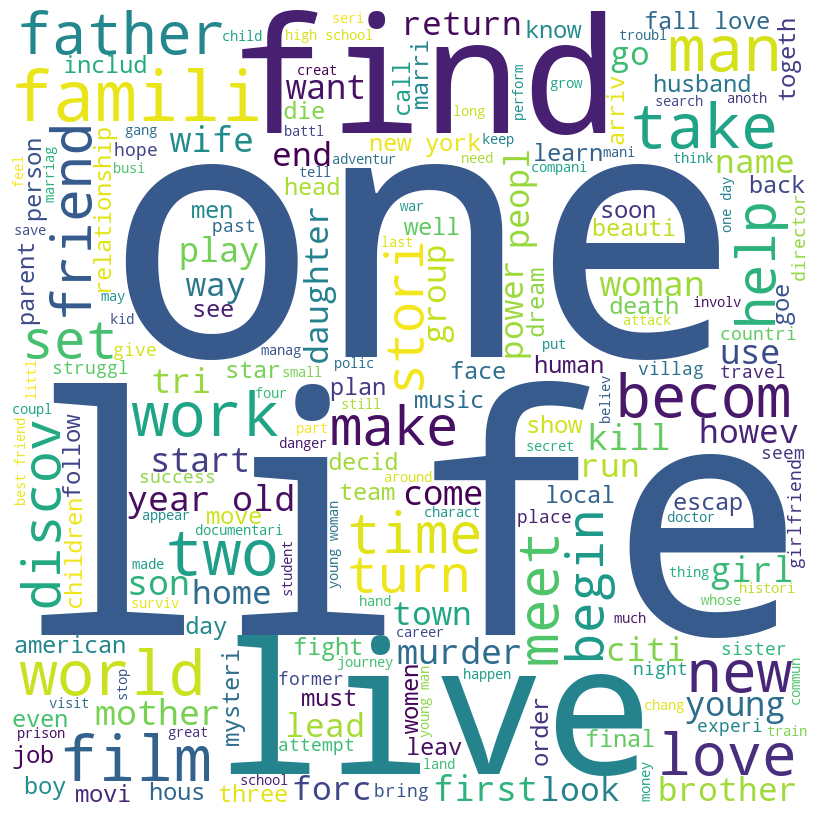

In [23]:
from wordcloud import WordCloud

# Concatenate the `clean_overview` into a single string
text = ' '.join(preprocessed_df['clean_overview'])

# Create a wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

# Plot the wordcloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Now we can save the current dataframe as a csv file for future use.<br>Before doing so, let's perform a sanity check by looking for any null values in the dataset.

In [58]:
# Any null values?
preprocessed_df.isna().sum()

imdb_id               0
title                 0
original_title        0
overview              0
genres                0
tagline           22308
poster_path         328
clean_overview        0
dtype: int64

Although `df.isna().sum()` is usually reliable to find out rows with missing values, it fails to catch the case where a column has a value, but the value is an empty string, which is not considered as a missing value. To prevent it, we can use the `str.strip()` method to remove any leading or trailing white spaces, and then check if the resulting string is empty.

In [27]:
# Check out rows with emptry string

empty_overview_rows = preprocessed_df[preprocessed_df['clean_overview'].str.strip() == ''][['imdb_id', 'title']]
print(empty_overview_rows)

         imdb_id                                         title
4182   tt0212517                                     Snow days
4471   tt0098347                            Slaves of New York
12846  tt0441627                                     Game Over
17283  tt0094076                                           Sur
22998  tt0023881                  Charlie Chan's Greatest Case
26428  tt1309409                            Afstiros katallilo
27050  tt0160550                                        Moscow
27882  tt0436254                                          Dura
31550  tt0177892                            Cabbages and Kings
31561  tt0056269                          Four Winds of Heaven
32143  tt0034886                                       Iceland
34116  tt1170402                   Loafing and Camouflage: I-4
38564  tt1979283  The Island 2: The Hunt for the Lost Treasure
39359  tt0415678                                  Shadowboxing
39680  tt1569465                    Nasha Russia: Yayts

We should drop these rows.

In [59]:
# Drop all the rows that have an empty overview
preprocessed_df = preprocessed_df.drop(preprocessed_df[preprocessed_df['clean_overview'].str.strip() == ''].index)

In [60]:
# Sanity check
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41329 entries, 0 to 41347
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   imdb_id         41329 non-null  object
 1   title           41329 non-null  object
 2   original_title  41329 non-null  object
 3   overview        41329 non-null  object
 4   genres          41329 non-null  object
 5   tagline         19039 non-null  object
 6   poster_path     41001 non-null  object
 7   clean_overview  41329 non-null  object
dtypes: object(8)
memory usage: 2.8+ MB


Great! Let's save our dataframe now.

In [61]:
# Save our dataframe as a csv file
preprocessed_df.to_csv("preprocessed_no_null_40000.csv", encoding="utf-8", index=False)

## Summary
In this notebook, we used a dataset with over 40,000 movie information and conducted data cleaning, EDA, and data preprocessing using various tools (e.g., stemming with `PorterStemmer`). We created some visualizations, including bar plots and a wordcloud, to get some insight into the most frequent words in the dataset.

Now we are ready to conduct feature engineering and modeling in our next notebook [**Part_2_Feature_Engineering_Modeling**](https://github.com/treelunar/2023_Capstone_BSTN/blob/main/Part_2_Feature_Engineering_Modeling.ipynb).

## Acknowledgement

- [Stemming vs. Lemmatization in NLP](https://towardsdatascience.com/stemming-vs-lemmatization-in-nlp-dea008600a0) by Niklas Lang helped me understand the pros and cons of using each of the techniques and opting to stemming rather than lemmatization.